In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from zipfile import ZipFile
import os

In [4]:
directory = 'datasets/'
os.listdir(directory)

['test.csv', 'train.csv']

User_ID: Unique ID of the user. There are a total of 5891 users in the dataset.

Product_ID: Unique ID of the product. There are a total of 3623 products in the dataset.

Gender: indicates the gender of the person making the transaction.

Age: indicates the age group of the person making the transaction.

Occupation: shows the occupation of the user, already labeled with numbers 0 to 20.

City_Category: User's living city category. Cities are categorized into 3 different categories 'A', 'B' and 'C'.

Stay_In_Current_City_Years: Indicates how long the users has lived in this city.

Marital_Status: is 0 if the user is not married and 1 otherwise.

Product_Category_1 to _3: Category of the product. All 3 are already labaled with numbers.

Purchase: Purchase amount.

# Data Loading

In [50]:
train_set = pd.read_csv(directory+'train.csv')
test = pd.read_csv(directory+'test.csv') 

In [79]:
train_set.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [119]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [81]:
train_set.shape

(550068, 12)

In [82]:
test.shape

(233599, 11)

In [83]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [84]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


# Cleaning and Checking through the data

In [85]:
null_value_train = round(train_set.isnull().sum()/train_set.shape[0] *100, 2)
null_value_test = round(test.isnull().sum()/train_set.shape[0] *100, 2)

In [86]:
null_value_train

User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Product_Category_2            31.57
Product_Category_3            69.67
Purchase                       0.00
dtype: float64

In [87]:
null_value_test

User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Product_Category_2            13.15
Product_Category_3            29.55
dtype: float64

## Filling the missing value in the datasets

In [51]:
x_train = train_set.drop('Purchase', axis=1)
targets = train_set.Purchase

In [88]:
# for training set
product_cat2 = train_set['Product_Category_2'].median()
product_cat3 = train_set['Product_Category_3'].median()
train_set['Product_Category_2'].fillna(product_cat2, inplace=True)
train_set['Product_Category_3'].fillna(product_cat3, inplace=True)

In [89]:
round(train_set.isnull().sum()/train_set.shape[0] *100, 2)

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Purchase                      0.0
dtype: float64

In [90]:
train_set.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,550068.0,NaN,NaN,NaN,1003028.842401,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Product_ID,550068,3631,P00265242,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,550068,2,M,414259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,550068,7,26-35,219587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,550068.0,NaN,NaN,NaN,8.076707,6.52266,0.0,2.0,7.0,14.0,20.0
City_Category,550068,3,B,231173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,550068,5,1,193821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,550068.0,NaN,NaN,NaN,0.409653,0.49177,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,NaN,NaN,NaN,5.40427,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,550068.0,NaN,NaN,NaN,9.576434,4.226025,2.0,8.0,9.0,14.0,18.0


# EDA

## Gender

> Who purchase the most between Male and Female

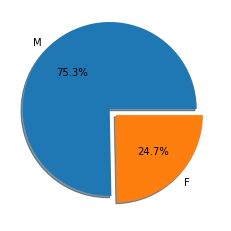

In [91]:
gender_percent = train_set.Gender.value_counts()
plt.pie(gender_percent, explode=[0.1, 0], labels=gender_percent.index, autopct='%1.1f%%',shadow=True);

There are more male buyer than female.

> Who bought more expensive things among the gender?

In [92]:
male_mean_purchase = train_set[train_set.Gender == 'M'].Purchase.mean()
female_mean_purchase = train_set[train_set.Gender == 'F'].Purchase.mean()
print(f'Male Purchase: {male_mean_purchase}')
print(f'Female Purchase: {female_mean_purchase}')

Male Purchase: 9437.526040472265
Female Purchase: 8734.565765155476


## Occupation

This is a numerical column which I think is for a categorical representation of different or common occupation of buyers.

> Wich Occupation has the highest buyer?

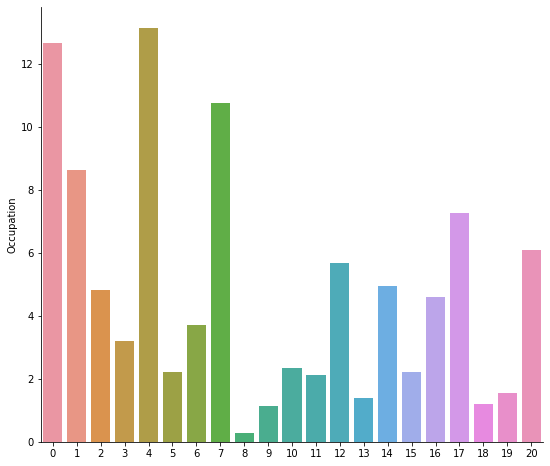

In [93]:
fig, ax = plt.subplots(figsize=(9, 8))
occupation_percent = round(train_set.Occupation.value_counts(normalize=True)*100,2)
sns.barplot(x=occupation_percent.index, y=occupation_percent)
sns.despine();

> Which Occupation bought expensive goods the most?

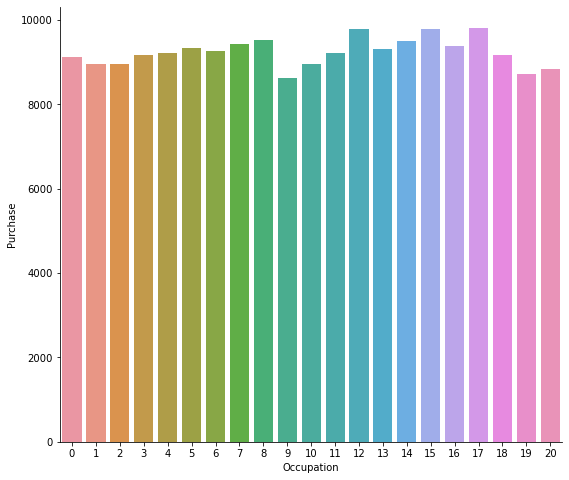

In [94]:
fig, ax = plt.subplots(figsize=(9, 8))
occupation_purchase = train_set.groupby('Occupation')['Purchase'].mean()
sns.barplot(x=occupation_purchase.index, y=occupation_purchase)
sns.despine();

## Age

In [95]:
train_set.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

> Age category that purchase the most?

In [96]:
age_percent = round(train_set.Age.value_counts(normalize=True)*100, 2)

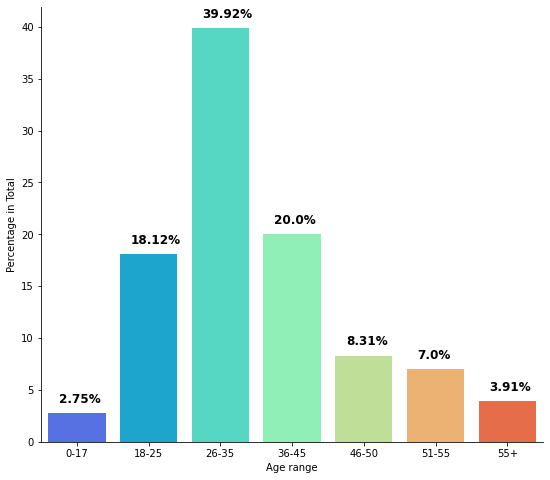

In [97]:
fig, ax = plt.subplots(figsize=(9, 8))
sns.barplot(y=age_percent, x=age_percent.index, order=['0-17','18-25','26-35','36-45','46-50','51-55','55+'], palette='rainbow')
for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()+1, str(i.get_height())+'%', fontsize=12, weight='bold',
                color='black')
plt.ylabel('Percentage in Total')
plt.xlabel('Age range')
sns.despine();

> Age category that bought expensive goods mostly?

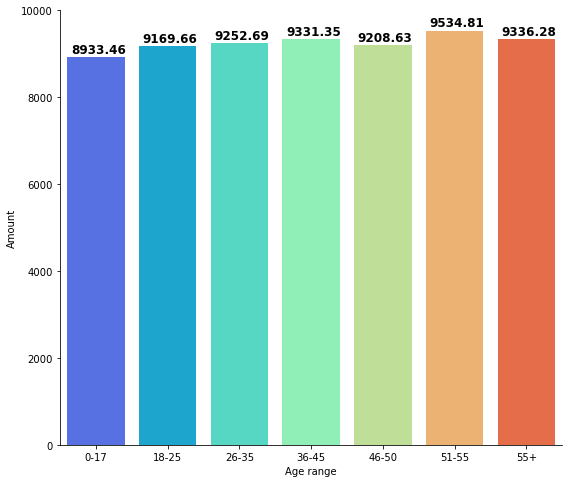

In [98]:
age_expensive = round(train_set.groupby('Age')['Purchase'].mean(), 2)
age_expensive
fig, ax = plt.subplots(figsize=(9, 8))
sns.barplot(y=age_expensive, x=age_expensive.index, order=['0-17','18-25','26-35','36-45','46-50','51-55','55+'], palette='rainbow')
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()+90, str(i.get_height()), fontsize=12, weight='bold',
                color='black')
plt.ylabel('Amount')
plt.xlabel('Age range')
sns.despine();

## City Category

> Which city appeared to purchase the most?

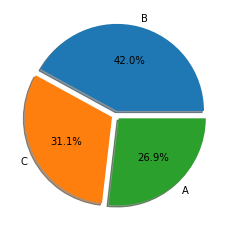

In [99]:
city_cat = train_set.City_Category.value_counts() 
plt.pie(city_cat, explode=[0.05,0.05,0.05], shadow=True, autopct='%1.1f%%', labels=city_cat.index);

> City that bought expensive goods the most?

In [100]:
city_cat_exp = round(train_set.groupby('City_Category')['Purchase'].mean(),2)

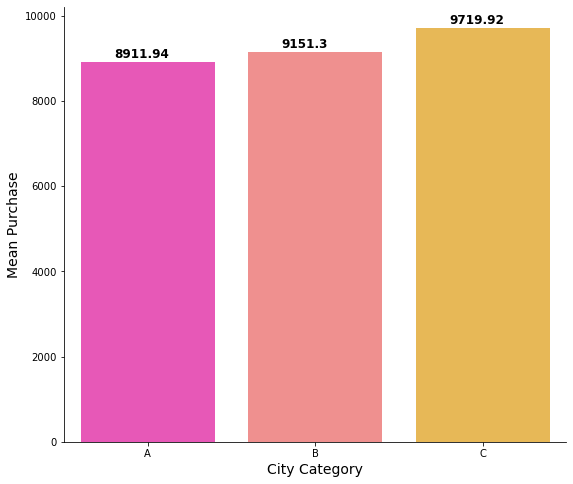

In [101]:
fig, ax = plt.subplots(figsize=(9, 8))
sns.barplot(x=city_cat_exp.index, y=city_cat_exp, palette='spring')
for i in ax.patches:
    ax.text(i.get_x()+.2, i.get_height()+100, str(i.get_height()), fontsize=12, weight='bold',
                color='black')
plt.ylabel('Mean Purchase', fontsize=14)
plt.xlabel('City Category', fontsize=14)
sns.despine();

It can be seen that buyers in city C buy more expensive goods compare to other cities

## Stay_In_Current_City_Years

> Does the years of stay in a city have influenced on the number of buyers?

In [102]:
years_purchase = round(train_set.Stay_In_Current_City_Years.value_counts(normalize=True)*100, 2)

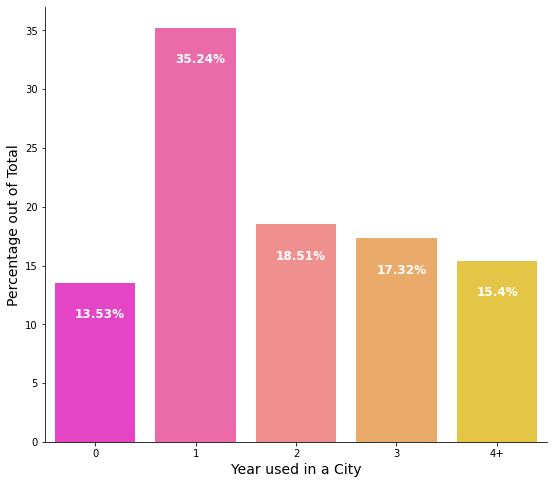

In [103]:
fig, ax = plt.subplots(figsize=(9, 8))
sns.barplot(x=years_purchase.index, y=years_purchase, palette='spring', order=['0', '1', '2', '3', '4+'])
for i in ax.patches:
    ax.text(i.get_x()+.2, i.get_height()-3, str(i.get_height())+'%', fontsize=12, weight='bold',
                color='white')
plt.ylabel('Percentage out of Total', fontsize=14)
plt.xlabel('Year used in a City', fontsize=14)
sns.despine();

This shows no deep relationship between the number of years used in a city and the number of buyers.

There's just a good point in the plot above, more attention need to be on buyers that have used a year and more in a city.

> Which year of stay in a city does buyers bought expensive goods?

In [104]:
city_year_exp = train_set.groupby(['City_Category', 'Stay_In_Current_City_Years'])['Purchase'].mean().reset_index()

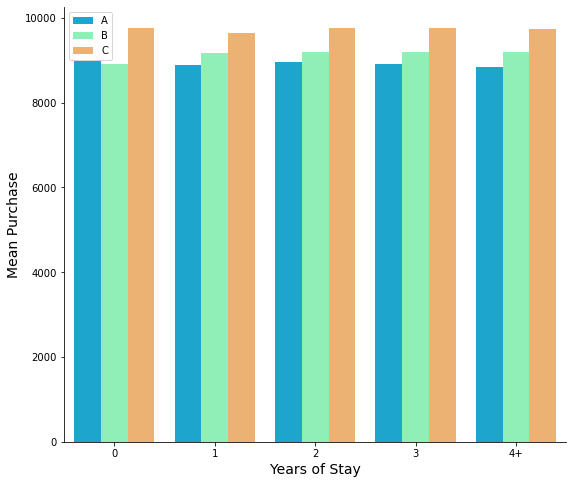

In [105]:
fig, ax = plt.subplots(figsize=(9, 8))
sns.barplot(data=city_year_exp, x='Stay_In_Current_City_Years',
           y='Purchase', hue='City_Category', palette='rainbow');
plt.ylabel('Mean Purchase', fontsize=14)
plt.xlabel('Years of Stay', fontsize=14)
plt.legend(loc='best')
sns.despine();

It's almost the same for all the years with respect to the cities but a point could be draw from the plot; Buyers in City C buy more expensive goods for all the possible years of stay in the city.

> Which City those buyers likely stay longer in and does it influence the sales?

In [106]:
city_year = train_set.groupby('City_Category')['Stay_In_Current_City_Years'].value_counts().rename('Count').reset_index()

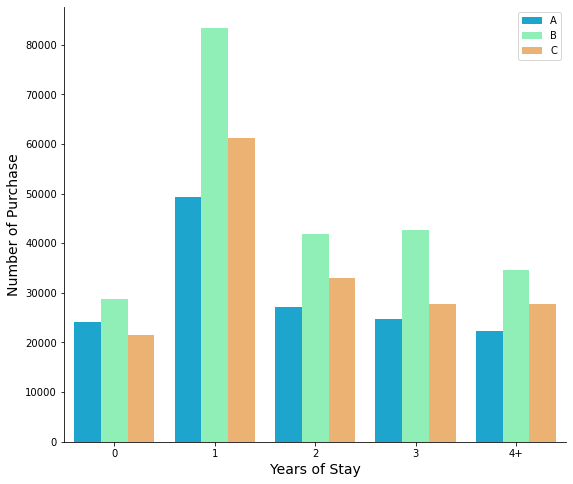

In [107]:
fig, ax = plt.subplots(figsize=(9, 8))
sns.barplot(data=city_year, x='Stay_In_Current_City_Years',
           y='Count', hue='City_Category', palette='rainbow', order=['0', '1', '2', '3', '4+']);
plt.ylabel('Number of Purchase', fontsize=14)
plt.xlabel('Years of Stay', fontsize=14)
plt.legend(loc='best')
sns.despine();

As we have seen before, there are more buyers among people who have stayed in the city for 1 year but the majority of the buyers are in City B.

## Marital Status

> Which of the marital status (Married or Single) purchase goods the most?

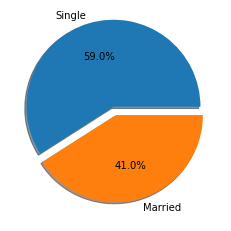

In [108]:
marital_status = train_set.Marital_Status.value_counts()
plt.pie(marital_status, explode=[0.1, 0], shadow=True, autopct='%1.1f%%', labels=['Single', 'Married']);

Single people purchase more goods so, more attention shoulf be focused on them.

In [109]:
marital_status_exp = round(train_set.groupby('Marital_Status')['Purchase'].mean(), 2)
marital_status_exp

Marital_Status
0    9265.91
1    9261.17
Name: Purchase, dtype: float64

Mean of their purchase is quite close meaning, there's a little difference in the cost of goods they purchased.

## Purchase

> Distribution of the purchase

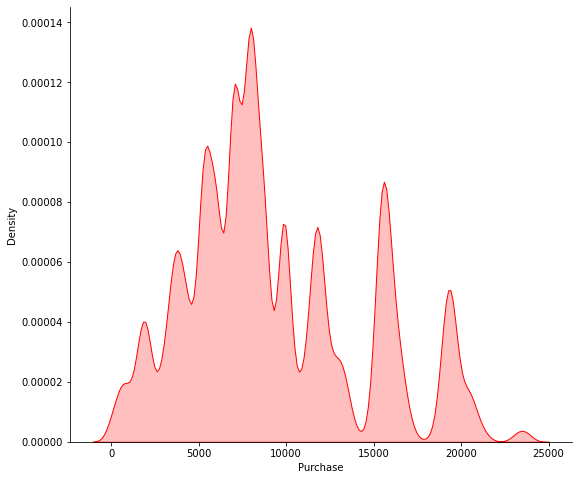

In [110]:
fig, ax = plt.subplots(figsize=(9, 8))
sns.kdeplot(train_set.Purchase, fill=True, color='red')
sns.despine();

This shows us that the number of purchase is higher between the cost of range 5000-10000

> Purchase distribution of the City with the highest number of purchase i.e., City C

In [111]:
city_c_purchase = train_set[train_set.City_Category == 'C'].Purchase

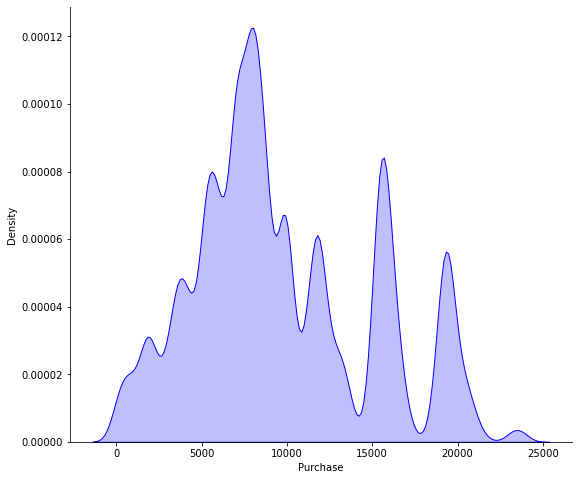

In [112]:
fig, ax = plt.subplots(figsize=(9, 8))
sns.kdeplot(city_c_purchase, fill=True, color='b')
sns.despine();

## Product Category

> Number of items in different section in All Category 

In [113]:
num_item_1 = train_set.groupby('Product_Category_1')['Product_ID'].nunique()
num_item_2 = train_set.groupby('Product_Category_2')['Product_ID'].nunique()
num_item_3 = train_set.groupby('Product_Category_3')['Product_ID'].nunique()

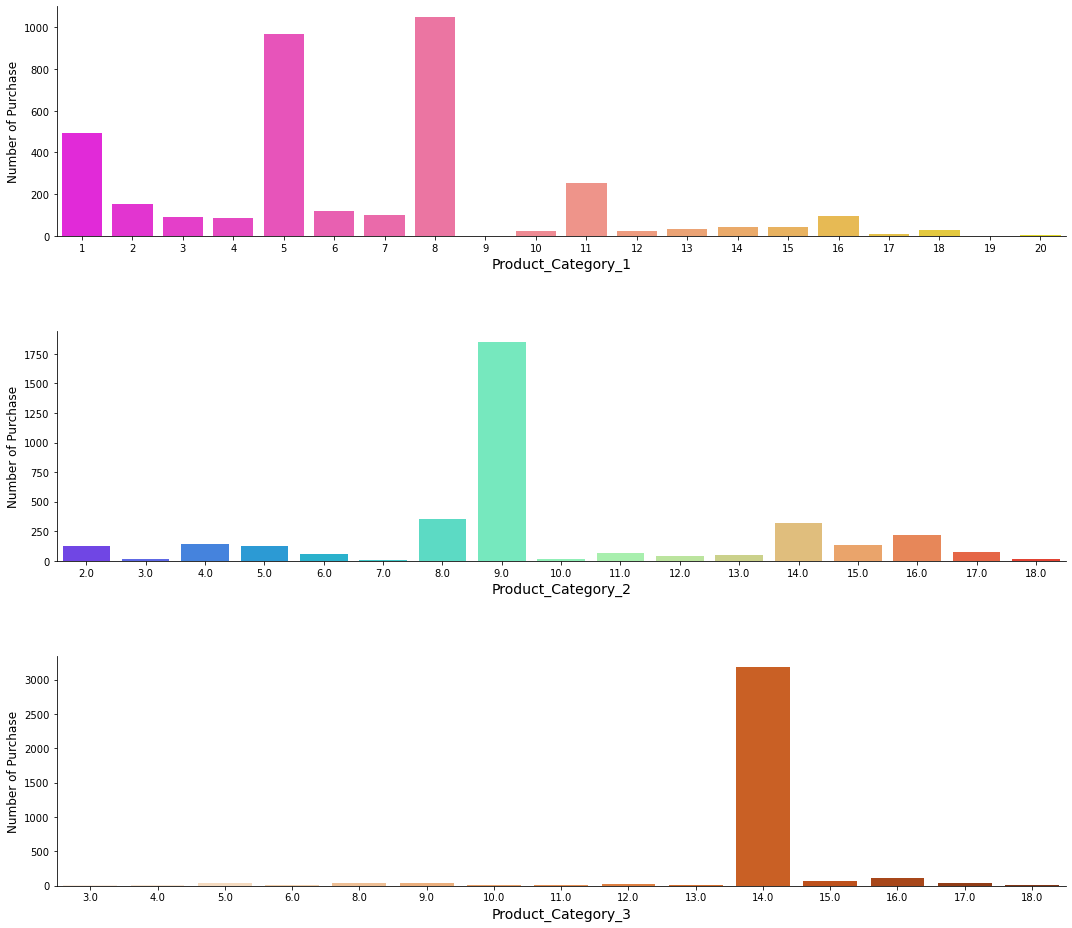

In [114]:
fig, ax = plt.subplots(figsize=(15, 13))
plt.subplot(3,1,1)
sns.barplot(x=num_item_1.index, y=num_item_1, palette='spring')
plt.xlabel('Product_Category_1', fontsize=14)
plt.ylabel('Number of Purchase', fontsize=12)

plt.subplot(3,1,2)
sns.barplot(x=num_item_2.index, y=num_item_2, palette='rainbow')
plt.xlabel('Product_Category_2', fontsize=14)
plt.ylabel('Number of Purchase', fontsize=12)

plt.subplot(3,1,3)
sns.barplot(x=num_item_3.index, y=num_item_3, palette='Oranges')
plt.xlabel('Product_Category_3', fontsize=14)
plt.ylabel('Number of Purchase', fontsize=12)
fig.tight_layout(h_pad=6)
sns.despine();

The above plot also tells about sections in a category and how high their number of purchase.

> Which of the section in each category has most expensive goods?

In [115]:
mean_purchase1 = train_set.groupby('Product_Category_1')['Purchase'].mean()
mean_purchase2 = train_set.groupby('Product_Category_2')['Purchase'].mean()
mean_purchase3 = train_set.groupby('Product_Category_3')['Purchase'].mean()

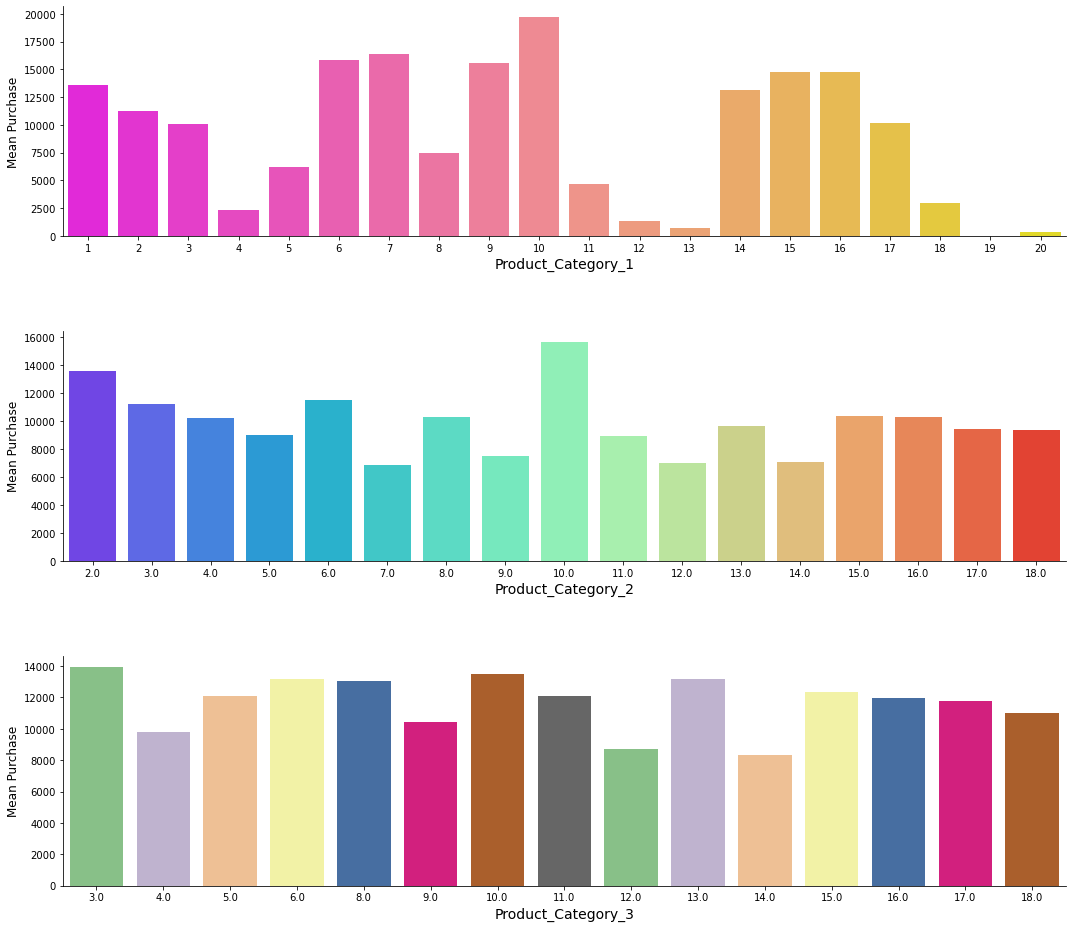

In [116]:
fig, ax = plt.subplots(figsize=(15, 13))
plt.subplot(3,1,1)
sns.barplot(x=mean_purchase1.index, y=mean_purchase1, palette='spring')
plt.xlabel('Product_Category_1', fontsize=14)
plt.ylabel('Mean Purchase', fontsize=12)

plt.subplot(3,1,2)
sns.barplot(x=mean_purchase2.index, y=mean_purchase2, palette='rainbow')
plt.xlabel('Product_Category_2', fontsize=14)
plt.ylabel('Mean Purchase', fontsize=12)

plt.subplot(3,1,3)
sns.barplot(x=mean_purchase3.index, y=mean_purchase3, palette='Accent')
plt.xlabel('Product_Category_3', fontsize=14)
plt.ylabel('Mean Purchase', fontsize=12)
fig.tight_layout(h_pad=6)
sns.despine();

# Columns Selection and Preprocessing of the data

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [53]:
x_test = test.copy()

In [117]:
x_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [118]:
x_train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

In [54]:
def transform_split(data, split, y_split):
    ''''
        The function is to transform the data and 
        split (only if necessary by passing True or False to the split parameter)
    '''
    num_pipeline = Pipeline([
    ('impute',SimpleImputer()),
    ('scaler', MinMaxScaler())
    ])
    def transform_data():
        #This inner function do the transformation
        x = data.drop(['User_ID','Product_ID'], axis=1)
        numeric_col = x.select_dtypes(include=['int64', 'float64']).columns.to_list()
        cat_col = x.select_dtypes(include= 'object').columns.to_list()
        full_pipeline = ColumnTransformer([
            ('num', num_pipeline, numeric_col),
            ('cat', OneHotEncoder(), cat_col)
        ])
        return full_pipeline.fit_transform(data)
    #For the case if we want to split the data
    if split:
        X = transform_data()
        X_train,X_val, y_train, y_val = train_test_split(X,y_split, test_size=0.3, random_state=42)
        return X_train,X_val, y_train, y_val
    #If we don't want to split the data, return the transformed only
    else:
        return transform_data()

In [55]:
#Transform and split the training set
X_train,X_val, y_train, y_val = transform_split(x_train, split=True, y_split = targets)

In [41]:
X_test = transform_split(x_test, split=False)

In [42]:
X_test.shape

(233599, 22)

In [56]:
X_train.shape

(385047, 22)

In [57]:
X_val.shape

(165021, 22)

# Training Different model and their Evaluations

### Ordinary Linear regression

In [58]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [59]:
from sklearn.metrics import r2_score, mean_squared_error
def check_score(model, x, y):
    model.fit(x,y)
    y_pred = model.predict(x)
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    print(f"R^2 Score: {round(r2,2)}")
    print(f"RMSE: {round(rmse,2)}")

In [60]:
check_score(model1, X_train, y_train)

R^2 Score: 0.13
RMSE: 4686.2


#### Regularized Linear Regression model

#### Ridge

In [61]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.5)
check_score(ridge, X_train, y_train)

R^2 Score: 0.13
RMSE: 4686.2


#### Lasso

In [62]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.5)
check_score(lasso, X_train, y_train)

R^2 Score: 0.13
RMSE: 4686.21


### Stochastic Gradient Descent Regressor

In [63]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
check_score(sgd, X_train, y_train)

R^2 Score: 0.13
RMSE: 4686.78


### Random Forest Regressor

In [64]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(random_state=42)
check_score(model2, X_train, y_train)

R^2 Score: 0.8
RMSE: 2261.68


### Decision Tree Regressor

In [66]:
from sklearn.tree import DecisionTreeRegressor
model3 = DecisionTreeRegressor(random_state=42)
check_score(model3, X_train, y_train)

R^2 Score: 0.81
RMSE: 2194.82


**NB: DecisionTreeRegressor performs better than the rest on the training set.**

# Saving the models 

In [67]:
import joblib
models = {
    'LinearRegressor':model1,
    'Ridge': ridge,
    'Lasso': lasso,
    'SDGRegressor': sgd,
    'RandomForest': model2,
    'DecisionTree': model3
}
joblib.dump(models, 'models.joblib')

['models.joblib']

In [68]:
model = joblib.load('models.joblib')

### Now, Let's check how the models perform on Validation set.

In [72]:
def val_pred(input_data, input_model):
    pred = model[input_model].predict(input_data)
    r2 = r2_score(y_val, pred)
    rmse = np.sqrt(mean_squared_error(y_val, pred))
    print(f"For {input_model}:")
    print(f"R^2 Score: {round(r2,2)}")
    print(f"RMSE: {round(rmse,2)}")

In [73]:
val_pred(input_data=X_val, input_model='LinearRegressor')

For LinearRegressor:
R^2 Score: 0.13
RMSE: 4689.92


In [74]:
val_pred(input_data=X_val, input_model='Ridge')

For Ridge:
R^2 Score: 0.13
RMSE: 4689.99


In [75]:
val_pred(input_data=X_val, input_model='Lasso')

For Lasso:
R^2 Score: 0.13
RMSE: 4690.01


In [78]:
val_pred(input_data=X_val, input_model='SDGRegressor')

For SDGRegressor:
R^2 Score: 0.13
RMSE: 4690.55


In [76]:
val_pred(input_data=X_val, input_model='RandomForest')

For RandomForest:
R^2 Score: 0.63
RMSE: 3058.85


In [77]:
val_pred(input_data=X_val, input_model='DecisionTree')

For DecisionTree:
R^2 Score: 0.55
RMSE: 3370.51


## Choosing the best model to use and validate with the Validation set